In [1]:
! pip install dill

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno
import dill as pickle
import sklearn
from sklearn.impute import SimpleImputer

In [3]:
print('using numpy v.' + np.__version__)
print('using pandas v.' + pd.__version__)
print('using seaborn v.' + sns.__version__)
print('using missingno v.' + msno.__version__)
print('using sklearn v.' + sklearn.__version__)
print('using dill v.' + pickle.__version__)

using numpy v.1.23.5
using pandas v.1.0.5
using seaborn v.0.10.1
using missingno v.0.4.2
using sklearn v.0.23.1
using dill v.0.3.6


In [4]:
PATH = "C:/Users/Paul/Documents/Cours Data Scientist OC/Projet 7/data/"
df = pd.read_csv(PATH+"application_train.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


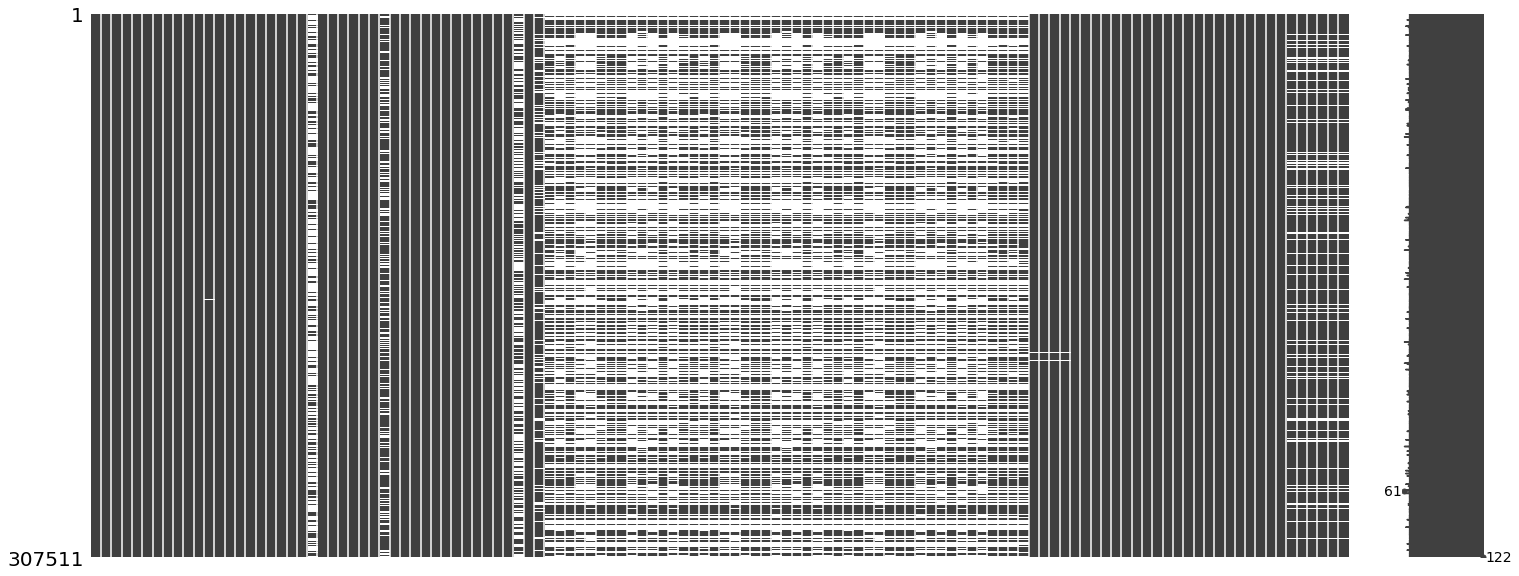

In [5]:
msno.matrix(df)

In [6]:
def boolswap(series):
    # Swaps 0 and 1 in a series
    series = series.replace({
        0: 1,
        1: 0
    })
    return series

In [7]:
df['TARGET'] = boolswap(df['TARGET'])
df['TARGET'].value_counts()

1    282686
0     24825
Name: TARGET, dtype: int64

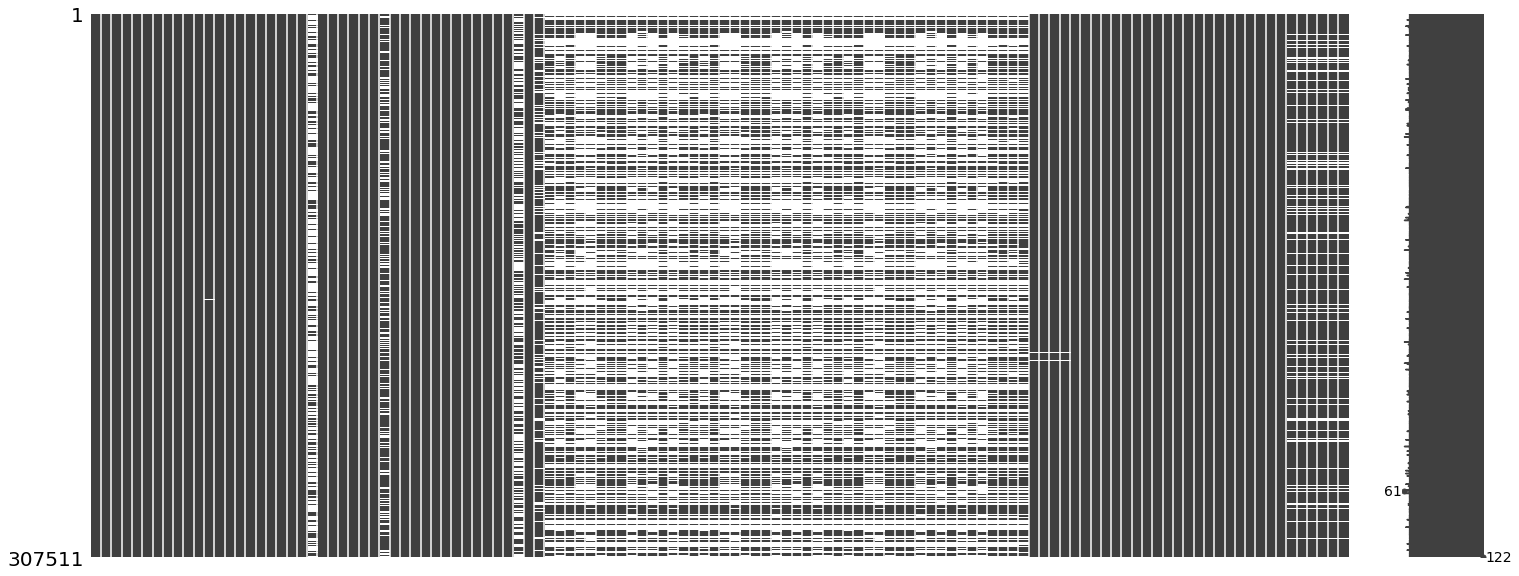

In [8]:
df = df.drop_duplicates()
msno.matrix(df)

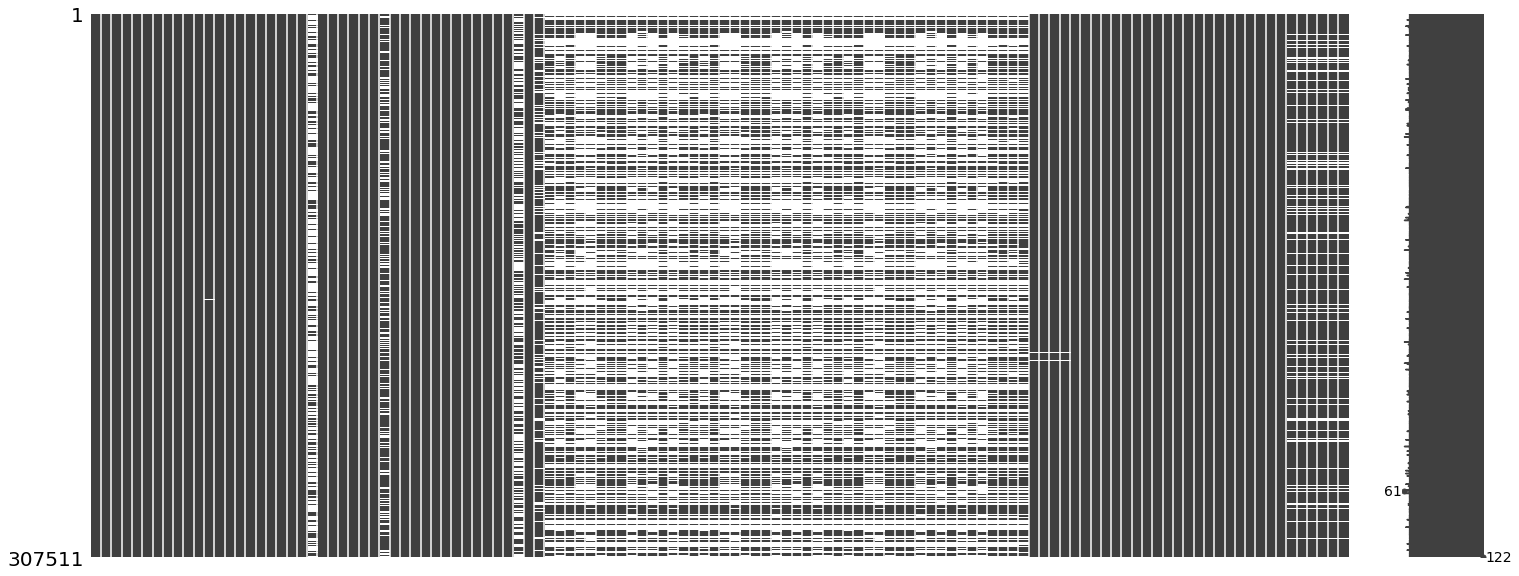

In [9]:
df = df.drop_duplicates(subset=['SK_ID_CURR'])
msno.matrix(df)

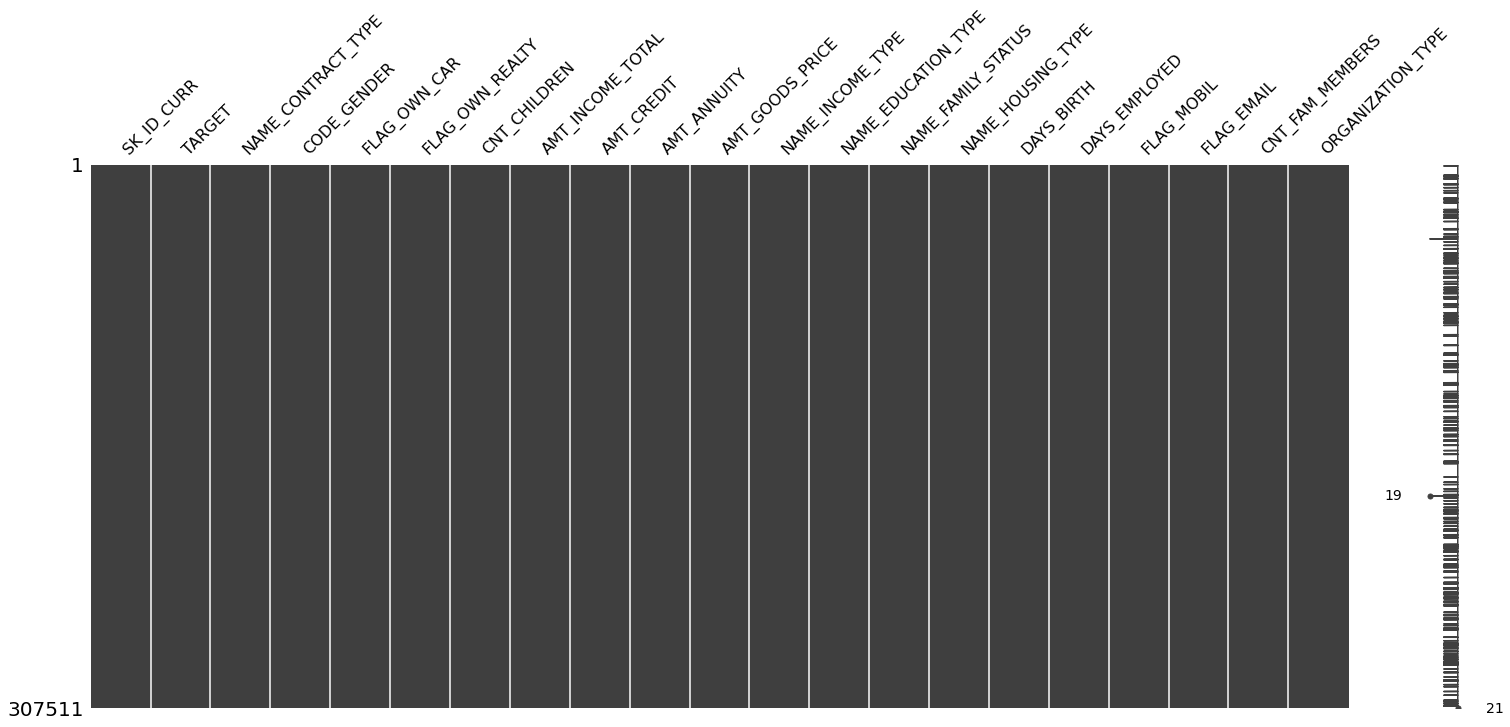

In [10]:
to_drop = [
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'OWN_CAR_AGE',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_POPULATION_RELATIVE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'TOTALAREA_MODE',
    'FONDKAPREMONT_MODE',
    'WALLSMATERIAL_MODE',
    'HOUSETYPE_MODE',
    'EMERGENCYSTATE_MODE',
    'OCCUPATION_TYPE'
]

df = df.drop(to_drop, axis=1)
msno.matrix(df)

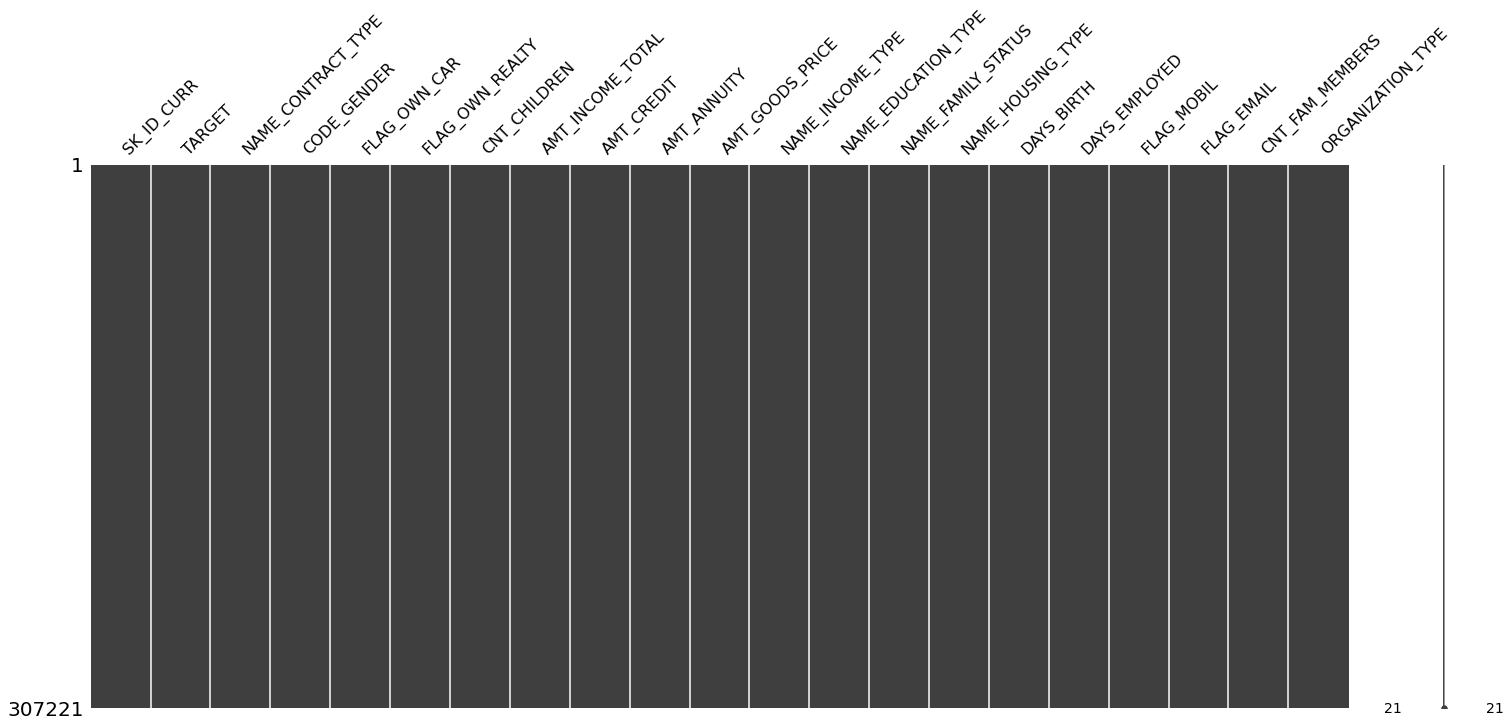

In [11]:
ind = df.loc[df['AMT_ANNUITY'].isna()].index
df = df.drop(ind, axis=0)

ind2 = df.loc[df['CNT_FAM_MEMBERS'].isna()].index
df = df.drop(ind2, axis=0)

ind3 = df.loc[df['AMT_GOODS_PRICE'].isna()].index
df = df.drop(ind3, axis=0)

msno.matrix(df)

In [12]:
df['INCOME_CREDIT_RATE'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_RATE'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
0,100002,0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,-9461,-637,1,0,1.0,Business Entity Type 3,0.498036,0.121978,0.060749
1,100003,1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,-16765,-1188,1,0,2.0,School,0.208736,0.132217,0.027598
2,100004,1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,-19046,-225,1,0,1.0,Government,0.500000,0.100000,0.050000
3,100006,1,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,-19005,-3039,1,0,2.0,Business Entity Type 3,0.431748,0.219900,0.094941
4,100007,1,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,-19932,-3038,1,0,1.0,Religion,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,1,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,With parents,-9327,-236,1,0,1.0,Services,0.618375,0.174971,0.108198
307507,456252,1,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,House / apartment,-20775,365243,1,0,1.0,XNA,0.267112,0.166687,0.044524
307508,456253,1,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,House / apartment,-14966,-7921,1,1,1.0,School,0.225776,0.195941,0.044239
307509,456254,0,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,House / apartment,-11961,-4786,1,0,2.0,Business Entity Type 1,0.462029,0.118158,0.054592


In [13]:
df['CODE_GENDER'].value_counts()

F      202251
M      104966
XNA         4
Name: CODE_GENDER, dtype: int64

In [14]:
df = df[df['CODE_GENDER']!="XNA"]
df['CODE_GENDER'].value_counts()

F    202251
M    104966
Name: CODE_GENDER, dtype: int64

In [15]:
df['CNT_CHILDREN'].value_counts()

0     215180
1      61050
2      26723
3       3711
4        427
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [16]:
df = df[df['CNT_CHILDREN']<7]
df['CNT_CHILDREN'].value_counts()

0    215180
1     61050
2     26723
3      3711
4       427
5        84
6        21
Name: CNT_CHILDREN, dtype: int64

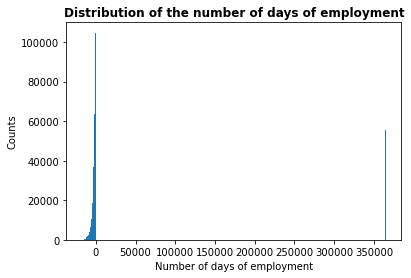

In [17]:
plt.hist(df['DAYS_EMPLOYED'], bins=300)
plt.ylabel('Counts')
plt.xlabel('Number of days of employment')
plt.title('Distribution of the number of days of employment', fontsize=12, fontweight='bold')
plt.show()

In [18]:
doe_max = df['DAYS_EMPLOYED'].max()
doe_max

365243

In [19]:
df.loc[df['DAYS_EMPLOYED']==doe_max]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
8,100011,1,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,House / apartment,-20099,365243,1,0,2.0,XNA,0.110336,0.300680,0.033176
11,100015,1,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,House / apartment,-20417,365243,1,0,2.0,XNA,0.258950,0.277947,0.071975
23,100027,1,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,House / apartment,-24827,365243,1,0,2.0,XNA,0.347092,0.286486,0.099437
38,100045,1,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,House / apartment,-23920,365243,1,0,2.0,XNA,0.400364,0.175136,0.070118
43,100050,1,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,House / apartment,-23548,365243,1,0,1.0,XNA,0.144718,0.397875,0.057580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,1,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,House / apartment,-22414,365243,1,0,1.0,XNA,0.287753,0.147867,0.042549
307483,456227,1,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,House / apartment,-24911,365243,1,0,1.0,XNA,0.400364,0.166455,0.066642
307487,456231,1,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,House / apartment,-23125,365243,1,0,2.0,XNA,0.109151,0.269000,0.029362
307505,456249,1,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,House / apartment,-24384,365243,1,0,1.0,XNA,0.500000,0.196000,0.098000


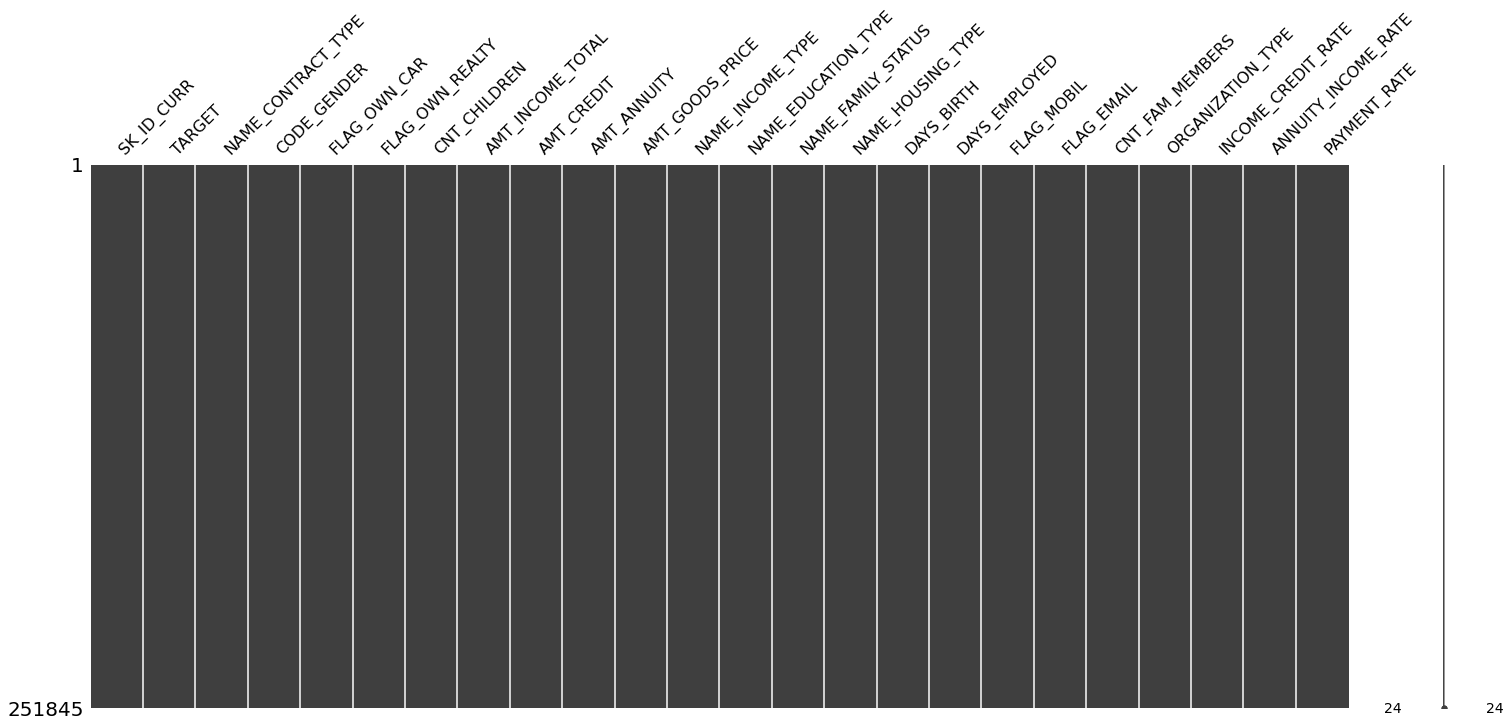

In [20]:
df = df[df['DAYS_EMPLOYED']<doe_max]
df['DAYS_EMPLOYED'] = - df['DAYS_EMPLOYED'] 
msno.matrix(df)

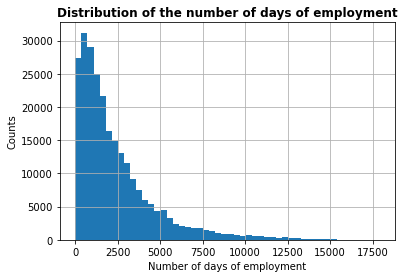

In [21]:
plt.hist(df['DAYS_EMPLOYED'], bins=50)
plt.ylabel('Counts')
plt.xlabel('Number of days of employment')
plt.title('Distribution of the number of days of employment', fontsize=12, fontweight='bold')
plt.grid()
plt.show()

In [22]:
def IQ_analysis(series):
    # Sets the outliers to NaN in a Series
    try:
        series.sort_values(ascending=True)
        # First quartile
        Q1 = series.quantile(0.25)
        # Third quartile
        Q3 = series.quantile(0.75)
        # Interquartile range
        IQ = Q3 - Q1
        # Lower bound
        lower = Q1 - 1.5*IQ
        # Upper bound
        upper = Q3 + 1.5*IQ
        # For each element in the Series
        for i in range(len(series)):
            # If value out of the bounds
            if series.iloc[i] > upper or series.iloc[i] < lower:
                # Setting to NaN
                series.iloc[i]=float('nan')
        return series
    except TypeError:
        return series

C:\Users\Paul\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


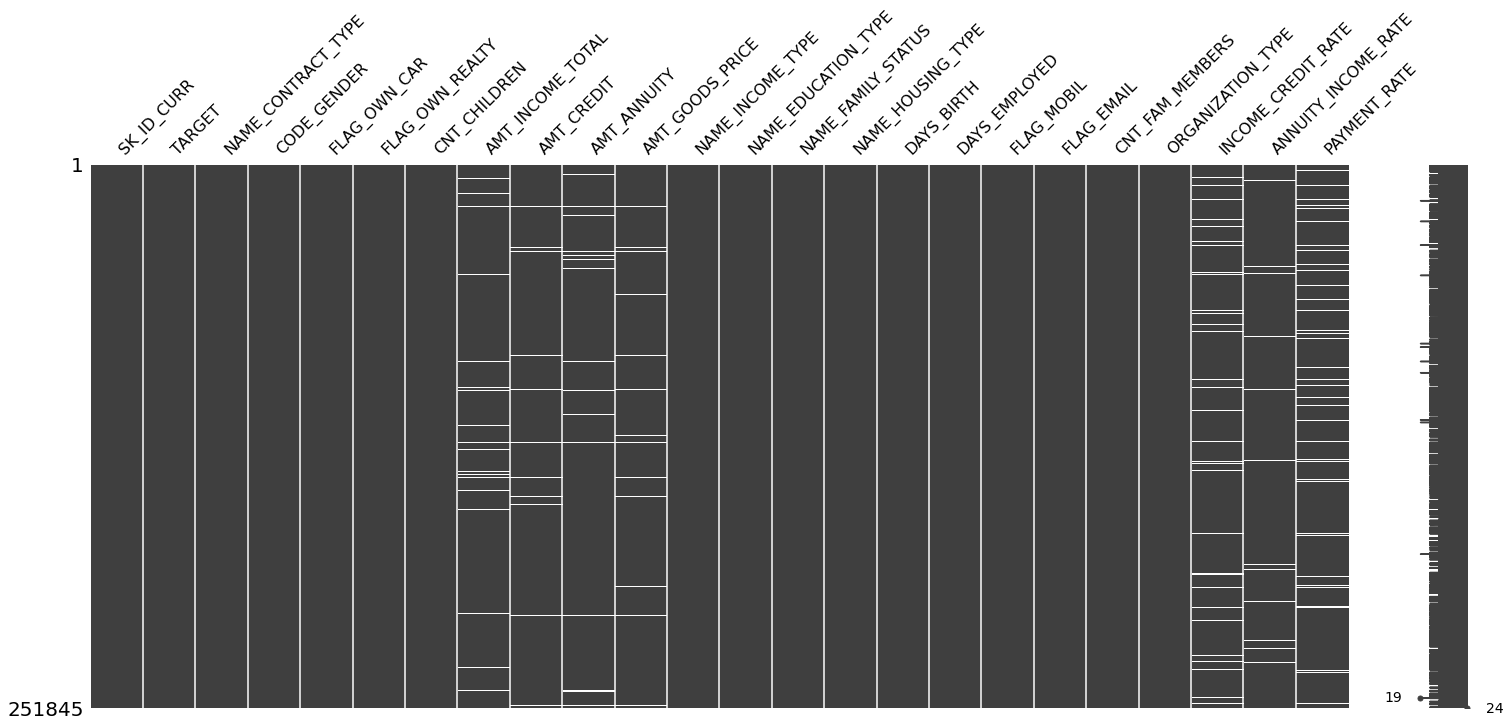

In [23]:
cont = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'INCOME_CREDIT_RATE',
    'ANNUITY_INCOME_RATE',
    'PAYMENT_RATE'    
]

for i in cont:
    df[i] = IQ_analysis(df[i])

msno.matrix(df)

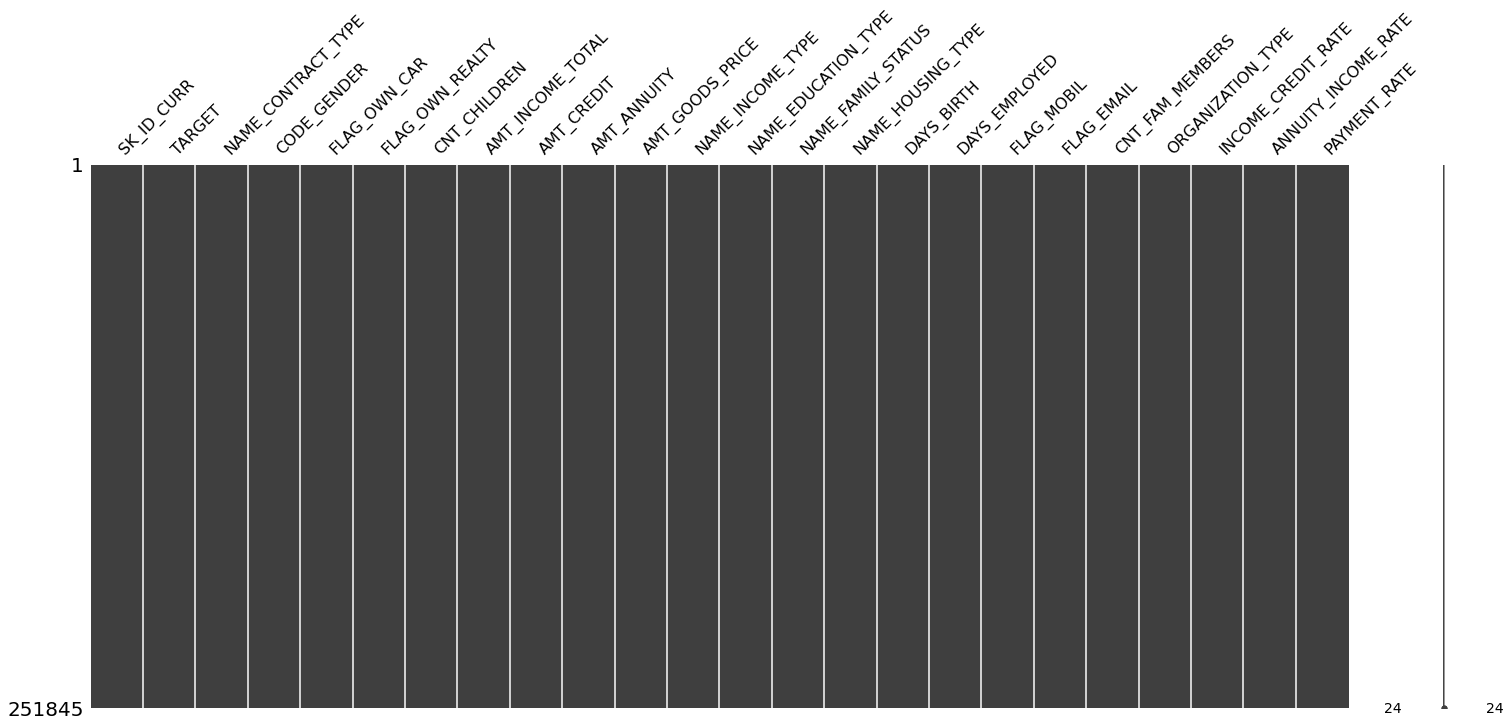

In [24]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_mean.fit(df[cont])
df[cont] = imputer_mean.transform(df[cont])
msno.matrix(df)

C:\Users\Paul\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


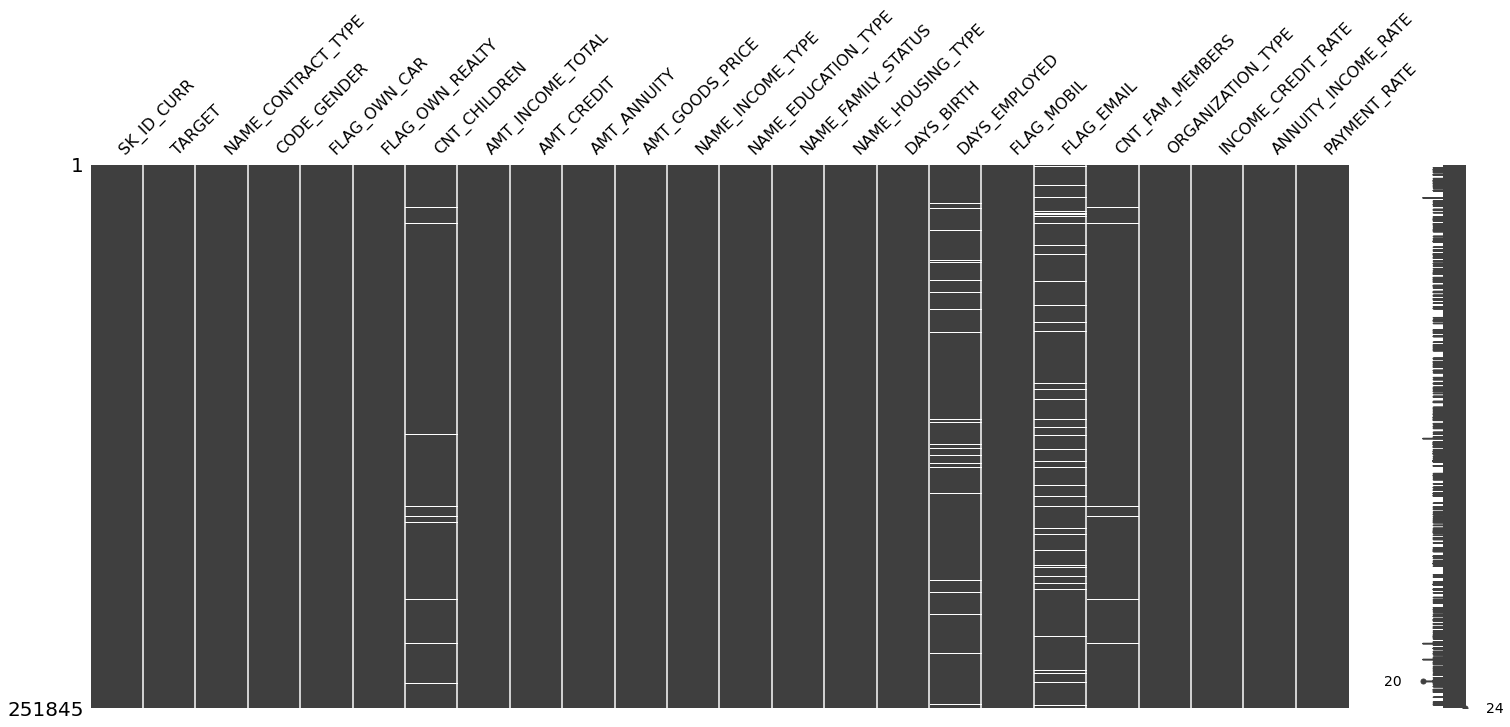

In [25]:
categ = [
    'CNT_CHILDREN',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'FLAG_MOBIL',
    'FLAG_EMAIL',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE'  
]

for i in categ:
    df[i] = IQ_analysis(df[i])

msno.matrix(df)

C:\Users\Paul\anaconda3\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\Paul\anaconda3\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = 

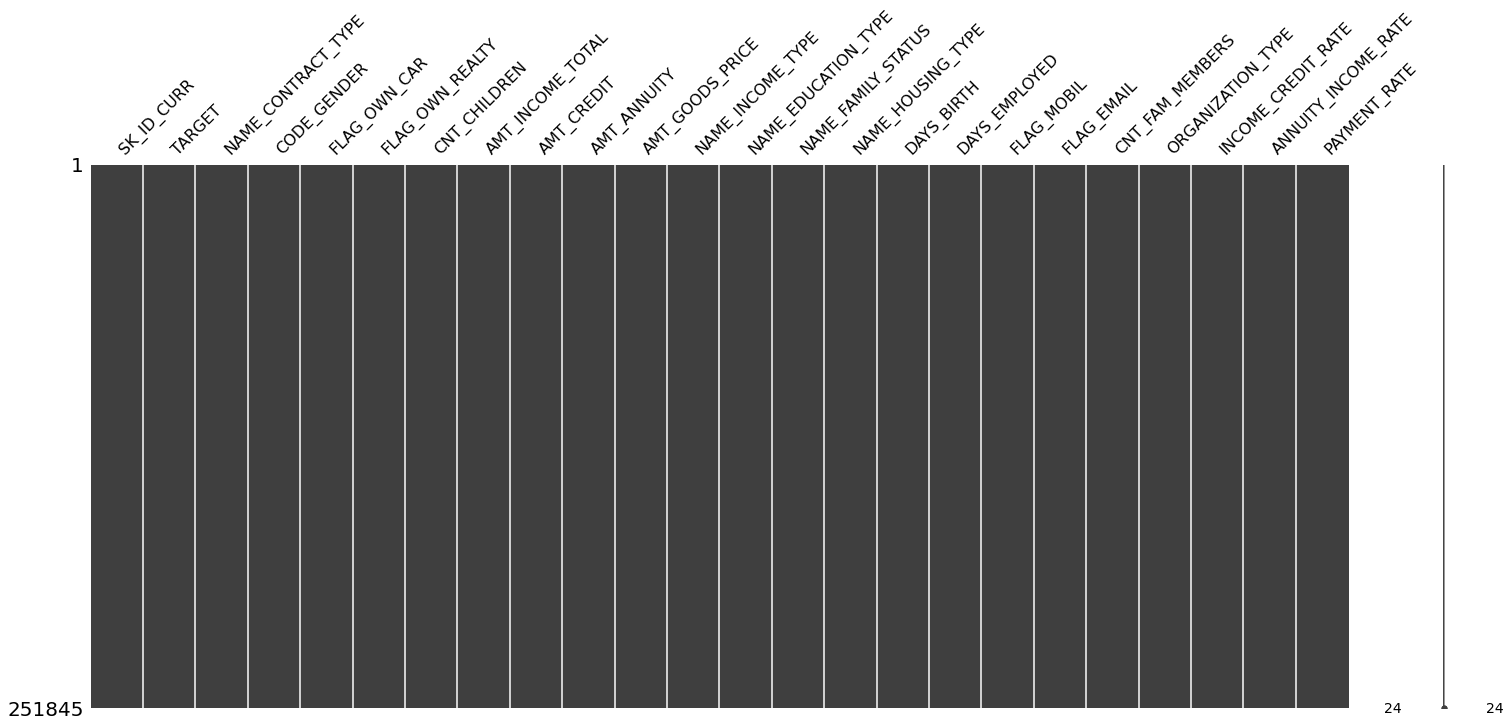

In [26]:
imputer_mf = SimpleImputer(strategy='most_frequent')
imputer_mf.fit(df[categ])
df[categ] = imputer_mf.transform(df[categ])
msno.matrix(df)

In [27]:
imputers_dict = {
    'imputer_mean': imputer_mean,
    'imputer_most_frequent': imputer_mf
}

# Save in pickle format
pickle.dump(imputers_dict, open('Pickles/imputers.pkl', 'wb'))

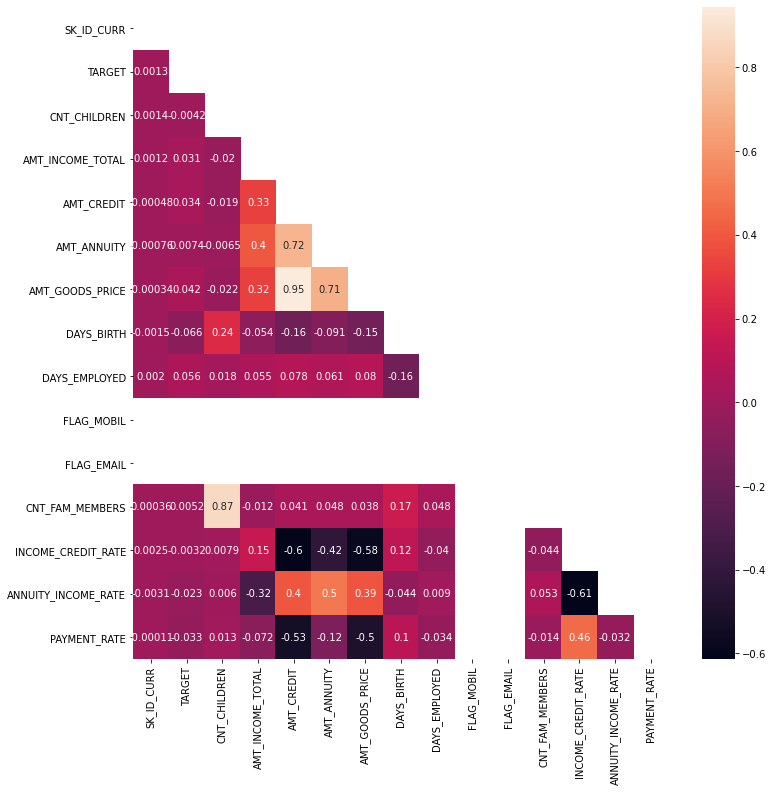

In [28]:
plt.figure(figsize=(12,12))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, annot=True)

In [29]:
df = df.set_index('SK_ID_CURR')
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,...,House / apartment,-9461,637.0,1.0,0.0,1.0,Business Entity Type 3,0.498036,0.121978,0.060749
100003,1,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,...,House / apartment,-16765,1188.0,1.0,0.0,2.0,School,0.208736,0.132217,0.027598
100004,1,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,...,House / apartment,-19046,225.0,1.0,0.0,1.0,Government,0.500000,0.100000,0.050000
100006,1,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,...,House / apartment,-19005,3039.0,1.0,0.0,2.0,Business Entity Type 3,0.431748,0.219900,0.094941
100007,1,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,...,House / apartment,-19932,3038.0,1.0,0.0,1.0,Religion,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456248,1,Cash loans,F,N,Y,0.0,153000.0,331920.0,16096.5,225000.0,...,House / apartment,-16705,200.0,1.0,0.0,1.0,Self-employed,0.460954,0.105206,0.048495
456251,1,Cash loans,M,N,N,0.0,157500.0,254700.0,27558.0,225000.0,...,With parents,-9327,236.0,1.0,0.0,1.0,Services,0.618375,0.174971,0.050597
456253,1,Cash loans,F,N,Y,0.0,153000.0,677664.0,29979.0,585000.0,...,House / apartment,-14966,200.0,1.0,0.0,1.0,School,0.225776,0.195941,0.044239


In [30]:
df.to_csv(PATH+'cleaned_data.csv', index=True, index_label='SK_ID_CURR')